In [114]:
import pandas as pd
from pandas import DataFrame
from pandas.plotting import autocorrelation_plot
import pandas.util.testing as tm
from pandas.tseries.offsets import DateOffset
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from numpy import sqrt
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
import warnings
warnings.filterwarnings('ignore')

In [115]:
# Leitura do CSV e setando como Time
df = pd.read_csv('FT02_18_19.csv',delimiter=';', parse_dates=True)
df['Time'] = pd.to_datetime(df.Time)
df = df[df['Time'].notna()]
df = df.set_index('Time')
df = df.resample("D").last()

In [116]:
model = sm.tsa.statespace.SARIMAX(df, order=(3,1,2), seasonal_order=(3,1,2,12))
results = model.fit()

<AxesSubplot:xlabel='Time'>

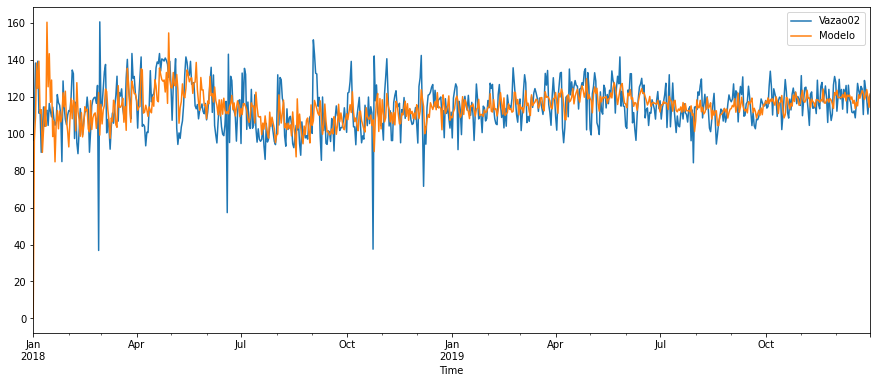

In [117]:
df['Modelo'] = results.predict(start='2018-01-01', dynamic=False)
df[['Vazao02','Modelo']].plot(figsize=(15,6))

In [118]:
future_dates = [df.index[-1] + DateOffset(days = x)for x in range(0,32)]
future_datest_df = pd.DataFrame(index = future_dates[1:], columns = df.columns)
future_datest_df.tail()

,Vazao02,Modelo
2020-01-27,NaN,NaN
2020-01-28,NaN,NaN
2020-01-29,NaN,NaN
2020-01-30,NaN,NaN
2020-01-31,NaN,NaN


<AxesSubplot:>

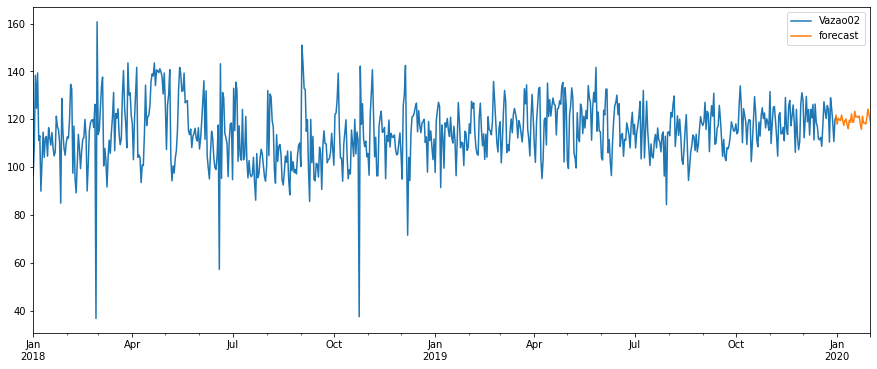

In [119]:
future_df = pd.concat([df,future_datest_df])
future_df['forecast'] = results.predict(start = '2019-12-31', end='2020-02-01', dynamic= False)  
future_df[['Vazao02', 'forecast']].plot(figsize=(15, 6))

In [120]:
MAPE = mean_absolute_percentage_error(df['Vazao02'], df['Modelo'])
print("MAPE é: %.3f" %MAPE)

MAPE é: 0.084
